In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import datetime
import time
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.model_selection import train_test_split
from model import *

In [2]:
%load_ext autoreload
%autoreload 2
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# 关闭 SettingWithCopyWarning 
pd.set_option('mode.chained_assignment', None)

In [3]:
df = pd.read_csv('data.csv', encoding='gbk')

In [4]:
df.shape

(4754, 90)

In [5]:
df.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [6]:
x = df.drop('status', axis=1)
y = df['status']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2018)

# 数据类型分析

In [8]:
train = pd.concat((x_train, y_train), axis=1)

In [9]:
train_test = pd.concat((x_train, x_test))

In [10]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4754 entries, 110 to 537
Data columns (total 89 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobilit

原数据中数值型特征有 83 个，字符串类型特征有 7 个，多数特征缺失值不是特别多，student_feature 缺失值较多。

In [11]:
train_test.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [12]:
train_test.describe(include='O')

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4754,4754,4752,4754,4478,4450,4457
unique,4754,1,5,1,4309,207,232
top,20180507114554241000000388181339,卡号1,一线城市,xs,张龙,2018-04-14,2018-05-03
freq,1,4754,3403,4754,5,423,134


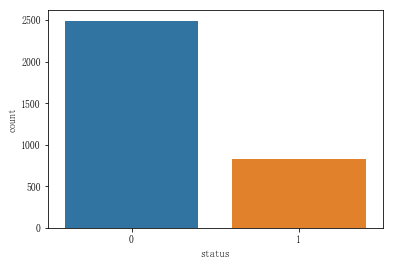

In [13]:
sns.countplot(train['status'])

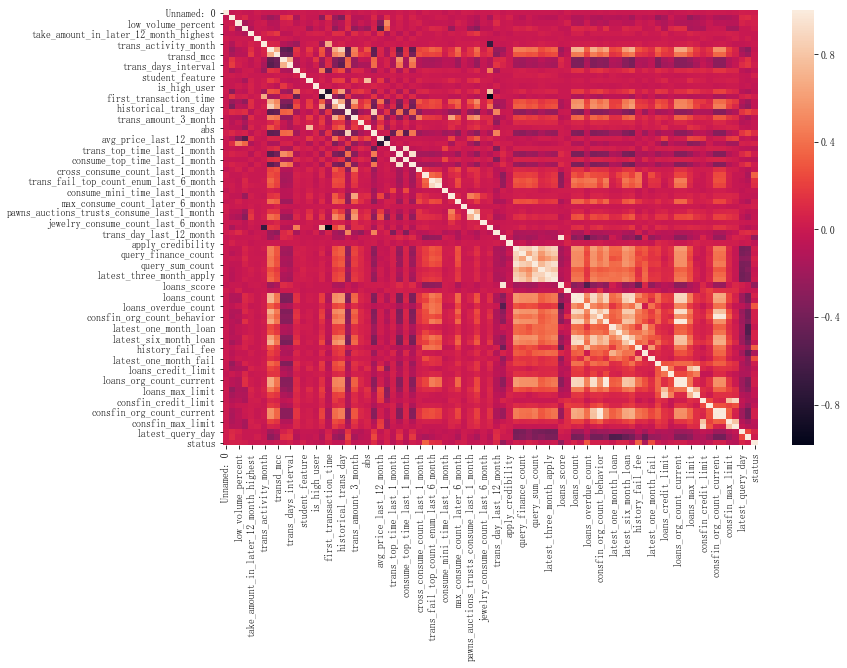

In [14]:
corr_mat = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat)

# 无关特征删除

## 类别特征

### bank_card_no 和 source

bank_card_no 和 source unique 等于 1，删除

In [15]:
train_test.drop(['bank_card_no', 'source'], axis=1, inplace=True)

### trade_no

In [16]:
train_test['trade_no'].head(10)

110     20180504182022079000000381847944
3394    20180507115234629000000023058189
3052    20180507121124018000000388268874
490     20180507123321187000000023093621
1       20180507121002192000000023073000
148     20180507124657109000000388412231
4113    20180504172153411000000021229876
1225    20180507122342976000000388321116
4567    20180507123645665000000388370714
2313    20180507115755292000000388219722
Name: trade_no, dtype: object

In [17]:
train_test['trade_no'].tail(10)

421     20180507122655086000000388334825
768     20180507115402218000000388205369
919     20180507120843364000000023071256
4747    20180507123811494000000388377504
4       20180507115448545000000388205844
4099    20180507122925749000000388344503
4051    20180504160750823000000381299261
1776    20180504182832296000000381875308
1395    20180507122536354000000388331267
537     20180507120202107000000388235577
Name: trade_no, dtype: object

In [18]:
def parse_trade_no(array):
    lst = [array[:4], array[4:6], array[6:8], array[-10:]]
    return lst

In [19]:
tradeno_df = pd.DataFrame(train_test['trade_no'].apply(parse_trade_no).values.tolist(), columns=['tradeno_year', 'tradeno_month', 'tradeno_day', 'tradeno_id'])

In [20]:
tradeno_df.describe()

,tradeno_year,tradeno_month,tradeno_day,tradeno_id
count,4754,4754,4754,4754
unique,1,1,3,4754
top,2018,05,07,0381705907
freq,4754,4754,3682,1


In [21]:
tradeno_df['tradeno_day'].value_counts()

07    3682
04    1062
08      10
Name: tradeno_day, dtype: int64

trade_no 字段像个 id 字段，假设前 8 位是年月日信息，可以看出 trade_no 均是在 2018 年 5 月份，tradeno_id 各不相同，保留 tradeno_day，其他的信息删除。

In [22]:
train_test = pd.concat((train_test.drop('trade_no', axis=1), tradeno_df['tradeno_day']), axis=1)

In [23]:
train_test['tradeno_day'].value_counts()

07    3682
04    1062
08      10
Name: tradeno_day, dtype: int64

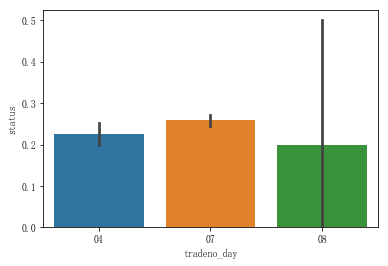

In [24]:
sns.barplot(data=pd.concat((train_test.loc[:x.shape[0]], y), axis=1), x='tradeno_day', y='status')

### id_name

找出出现次数比较多的人名，看看逾期率

In [25]:
idname_count=train_test['id_name'].value_counts()

idname_count = idname_count[idname_count>=4]

idn_df = train[train['id_name'].isin(idname_count.index)]

In [26]:
idn_df['id_name'].value_counts()

陈鹏    4
张龙    4
张伟    3
李杰    3
李明    3
刘强    3
张超    2
陈波    2
李波    1
Name: id_name, dtype: int64

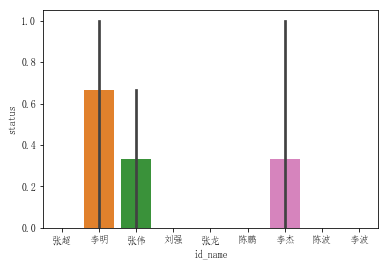

In [27]:
sns.barplot(data=idn_df, x='id_name', y='status')

李明这个人逾期率挺高的，重点提出来作为类别变量

In [28]:
train_test['is_Li_Ming'] = (df['id_name'] == '李明').apply(int)

In [29]:
train_test.drop('id_name', inplace=True, axis=1)

## 数值特征

In [30]:
value_cols = train_test.describe().columns

In [31]:
train_test[value_cols].nunique().describe()

count      83.000000
mean      486.650602
std      1051.987056
min         2.000000
25%        25.000000
50%        65.000000
75%       222.500000
max      4754.000000
dtype: float64

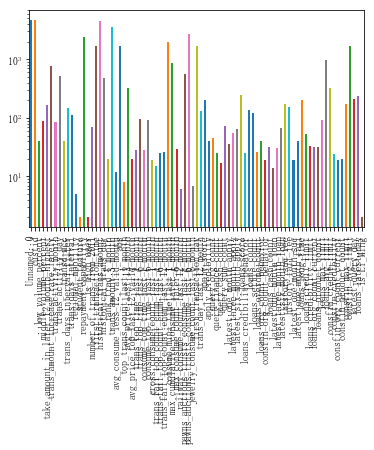

In [32]:
train_test[value_cols].nunique().plot(kind='bar', logy=True)

In [33]:
print('数值特征 unique < 10 个数：', len(train_test[value_cols].columns[train_test[value_cols].nunique()<10]))
print('数值特征 unique < 20 个数：', len(train_test[value_cols].columns[train_test[value_cols].nunique()<20]))
print('数值特征 unique < 30 个数：', len(train_test[value_cols].columns[train_test[value_cols].nunique()<30]))

数值特征 unique < 10 个数： 7
数值特征 unique < 20 个数： 15
数值特征 unique < 30 个数： 27


In [34]:
print('全部为 unique 的特征', train_test[value_cols].columns[train_test[value_cols].nunique()==len(train_test)])

全部为 unique 的特征 Index(['Unnamed: 0', 'custid'], dtype='object')


从 unique 数量来讲，没有 unique == 1 的情况，先不予删除。

### custid

custid 范围中 100~400W，如果假设注册越早，id 越小，看一下 id 大小与逾期率的关系。

In [35]:
np.logspace(1, 10, 7)

array([1.00000000e+01, 3.16227766e+02, 1.00000000e+04, 3.16227766e+05,
       1.00000000e+07, 3.16227766e+08, 1.00000000e+10])

In [36]:
custid_range = np.logspace(1, 7, 7)[1:]

In [37]:
train_test['cust_id_bin'] = pd.cut(train_test['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])

In [38]:
train_test['cust_id_bin'].value_counts()

1000000.0    3249
100000.0     1342
10000.0       149
1000.0         13
100.0           1
Name: cust_id_bin, dtype: int64

label 为 100 数据太少，并入 1000 中，1000000 之后再详细划分

In [39]:
custid_range = [1, 1e4, 1e5, 1e6, 2.5e6, 5e6]

In [40]:
train_test['cust_id_bin'] = pd.cut(train_test['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])
train_test.drop('custid', axis=1, inplace=True)

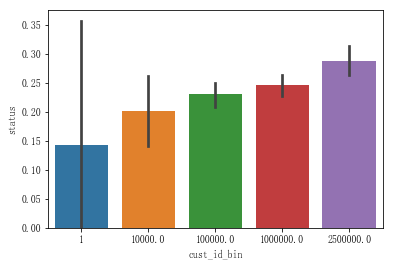

In [41]:
sns.barplot(data=pd.concat((train_test[:x.shape[0]], y),axis=1), x='cust_id_bin', y='status')

正如猜想的一样，id 越小，逾期率越低，可能原因是越最近注册的，是新用户，紧急用钱，越可能逾期。先保留 id 这个特征。

### Unnamed: 0

In [42]:
sum(train_test['Unnamed: 0'].diff(1)>0)

4753

In [43]:
len(train_test)

4754

Unnamed: 0 这个特征数值是递增的，删除

In [44]:
train_test.drop('Unnamed: 0', axis=1, inplace=True)

In [45]:
train_test.shape

(4754, 86)

# 数据类型转换

In [46]:
train_test.describe(include='O')

,reg_preference_for_trad,latest_query_time,loans_latest_time,tradeno_day
count,4752,4450,4457,4754
unique,5,207,232,3
top,一线城市,2018-04-14,2018-05-03,07
freq,3403,423,134,3682


## reg_preference_for_trad

In [47]:
train_test['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

城市之间存在大小差别，采用自然数编码

In [48]:
city_map = {'一线城市':1, '二线城市':2, '三线城市':3, '其他城市':0, '境外':5}

In [49]:
train_test['reg_preference_for_trad'] = train_test['reg_preference_for_trad'].map(city_map)

## tradeno_day

In [50]:
train_test['tradeno_day'] = train_test['tradeno_day'].astype('int')

In [51]:
train_test.describe(include='O')

,latest_query_time,loans_latest_time
count,4450,4457
unique,207,232
top,2018-04-14,2018-05-03
freq,423,134


# 缺失值处理

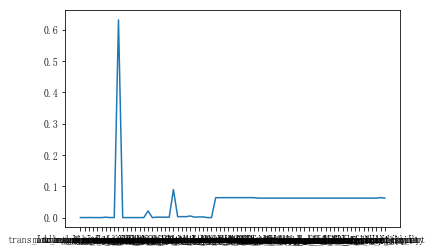

In [52]:
nan_prop = train_test.isnull().sum(axis=0)[train_test.isnull().sum(axis=0)!=0]/train_test.shape[0]
plt.plot(nan_prop)

## 缺失值处理

缺失值大概分成三类，比例在 60%，5%~10%, 1% 左右

### 缺失比例>10%

只有一列，转换成 one-hot 编码

In [53]:
nan100 = train_test[train_test.columns[train_test.isnull().sum(0)/train_test.shape[0]>0.1]]

In [54]:
nan100.columns

Index(['student_feature'], dtype='object')

In [55]:
nan100['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [56]:
def parse_student_feature(array):
    lst = [0, 0]
    if array == 1:
        lst[0] = 1
    elif array == 2:
        lst[1] = 1
    return lst

In [57]:
stu_featdf = pd.DataFrame(train_test['student_feature'].apply(parse_student_feature).values.tolist(
), columns=['student_feat_1', 'student_feat_2'])

In [58]:
train_test = pd.concat((train_test.drop('student_feature', axis=1), stu_featdf), axis=1)

In [59]:
## 缺失比例 < 1%

## 用众数或平均数填补

na1 = train_test[train_test.columns[(train_test.isnull().sum(0)/train_test.shape[0]<0.01)&(train_test.isnull().sum(0)/train_test.shape[0]>0)]]
print(na1.nunique())

print(na1.isnull().sum())

print(train_test[train_test['trans_fail_top_count_enum_last_1_month'].isnull()].index)
print(train_test[train_test['trans_fail_top_count_enum_last_6_month'].isnull()].index)
print(train_test[train_test['trans_fail_top_count_enum_last_12_month'].isnull()].index)

# trans_fail_top_count_enum_last_X_month 这几个特征在同一个位置信息都是缺失的。  
# 从数据来看，12month count 数目大于 6month，大于 1month。  
# 填充缺失值后注意检查一下。

# unique<10 的分类用众数，

# unique>10 的用平均数填充

for i in na1.columns:
    if train_test[i].nunique() < 10:
        train_test.loc[train_test[i].isnull(), i] = train_test[i].dropna().value_counts().index[0]
    else:
        train_test.loc[train_test[i].isnull(), i] = train_test[i].dropna().mean()

print(train_test[train_test.columns[(train_test.isnull().sum(0)/train_test.shape[0]<0.01)&(train_test.isnull().sum(0)/train_test.shape[0]>0)]].sum())

### 缺失比例 1%~10%

# 用随机森林预测填充这部分数据

na10 = train_test[train_test.columns[(train_test.isnull().sum(0)/train_test.shape[0] <= 0.1)
                     & (train_test.isnull().sum(0)/train_test.shape[0] >= 0.01)]]

def parse_time(s):
    try:
        dt = time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
    except:
        dt = np.nan
    return dt

na10['latest_query_time'] = na10['latest_query_time'].apply(parse_time)
na10['loans_latest_time'] = na10['loans_latest_time'].apply(parse_time)

def predict_nan(c):
#     c = 'consfin_avg_limit'
    print(c)
    nan_exist = train_test.loc[train_test[c].notnull()].drop(na10.columns, axis=1)
    y_nan = na10[c][na10[c].notnull()]
    nan_null = train_test.loc[train_test[c].isnull()].drop(na10.columns, axis=1)
    x = nan_exist.values
    y = y_nan.values
    rfr = RandomForestRegressor(n_estimators=100)
    rfr.fit(x, y)
    c_hat = rfr.predict(nan_null.values)
    c_hat = c_hat.astype(int)
    na10.loc[(na10[c].isnull()), c] = c_hat

for c in na10.columns:
    predict_nan(c)

na10['loans_latest_time'] = pd.to_datetime(na10['loans_latest_time'], unit='s').dt.strftime('%Y-%m-%d')
na10['latest_query_time'] = pd.to_datetime(na10['latest_query_time'], unit='s').dt.strftime('%Y-%m-%d')

for i in na10.columns:
    train_test[i] = na10[i]

# 缺失值处理完毕
print(train_test.isnull().sum(axis=0)[train_test.isnull().sum(axis=0) != 0]/train_test.shape[0])

low_volume_percent                           40
middle_volume_percent                        90
trans_amount_increase_rate_lately           782
trans_activity_month                         84
trans_activity_day                          512
transd_mcc                                   41
trans_days_interval_filter                  147
trans_days_interval                         114
regional_mobility                             5
number_of_trans_from_2011                    70
first_transaction_time                     1693
historical_trans_day                        476
rank_trad_1_month                            20
avg_consume_less_12_valid_month              12
top_trans_count_last_1_month                  8
reg_preference_for_trad                       5
trans_top_time_last_1_month                  28
trans_top_time_last_6_month                  97
consume_top_time_last_1_month                28
consume_top_time_last_6_month                94
trans_fail_top_count_enum_last_1_month  

特征工程之前的 AUC score

In [60]:
xgb_params1 = {
    'eta': 0.01,
    'min_child_weight': 15,
    'max_delta_step': 2,
    'colsample_bytree': 0.75,
    'subsample': 0.75,
    'seed': 234,
    'max_depth': 4,
    'nthread': 6,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    # 'num_class' : 2,
    'silent': 1,
    # 'scale_pos_weight': 4.6796,
}
x2 = train_test.drop(['loans_latest_time', 'latest_query_time'], axis=1)[:x_train.shape[0]].astype('float')
x_test2 = train_test.drop(['loans_latest_time', 'latest_query_time'], axis=1)[x_train.shape[0]:].astype('float')
m = ModelRun()
xgb = XgbWrapper(params=xgb_params1)
m.run_oof(xgb, x2.values, y_train.values, x_test2.values)

XGBoost
[0]	train-auc:0.590975	val-auc:0.513992
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 100 rounds.
Stopping. Best iteration:
[0]	train-auc:0.590975	val-auc:0.513992

1: Train 0.8129102 Val 0.4831819/0.4831819
--------------------------------------------------
[0]	train-auc:0.588929	val-auc:0.535322
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 100 rounds.
Stopping. Best iteration:
[20]	train-auc:0.75535	val-auc:0.592712

2: Train 0.8295238 Val 0.5724743/0.5278281
--------------------------------------------------
[0]	train-auc:0.59821	val-auc:0.49463
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 100 rounds.
Stopping. Best iteration:
[1]	train-auc:0.645434	val-auc:0.527282

3: Train 0.7958862 Val 0.4963700/0.5173421
----------------------

(array([0.31525263, 0.31256214, 0.34467706, ..., 0.33944499, 0.32959792,
        0.33552709]),
 array([0.31162781, 0.31403133, 0.32556816, ..., 0.33171266, 0.36347318,
        0.33823593]))

# 特征工程

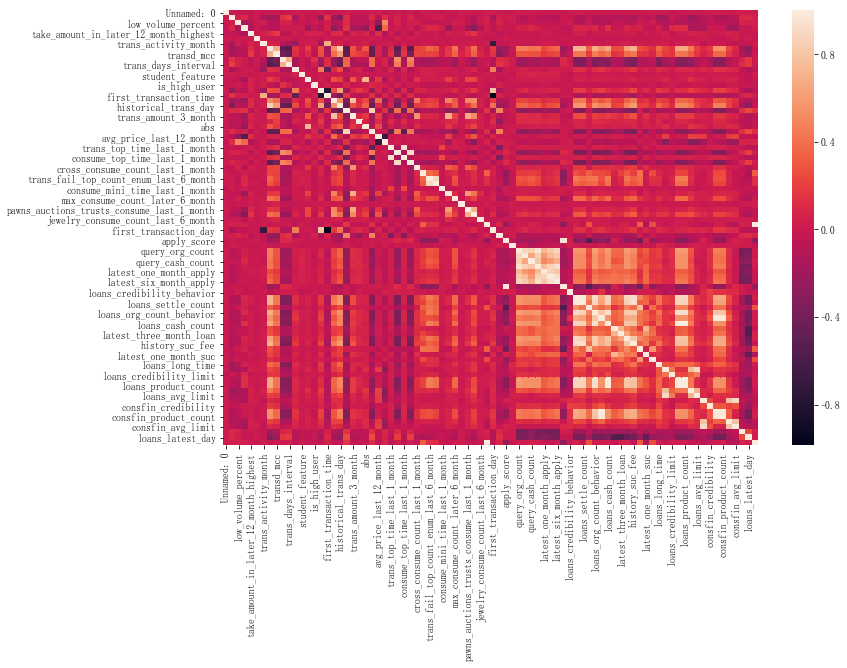

In [61]:
corr_mat = pd.concat((df, y), axis=1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat)

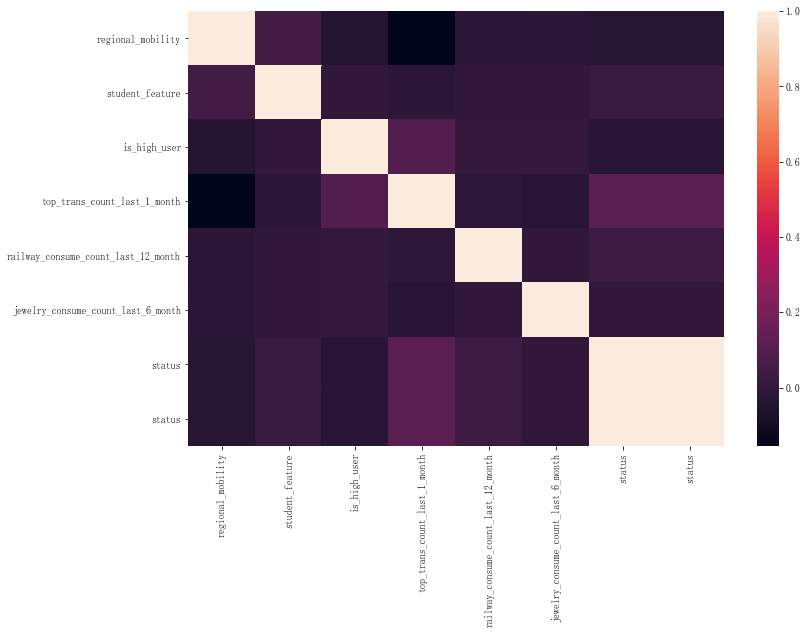

In [62]:
# nunique 小于 10 的 相关性系数
cat_cols = df.nunique()[df.nunique()<10].index
cat_df = df[cat_cols]
corr_mat = pd.concat((cat_df, y), axis=1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat)

并没有发现与 status 相关系数特别高的类别特征

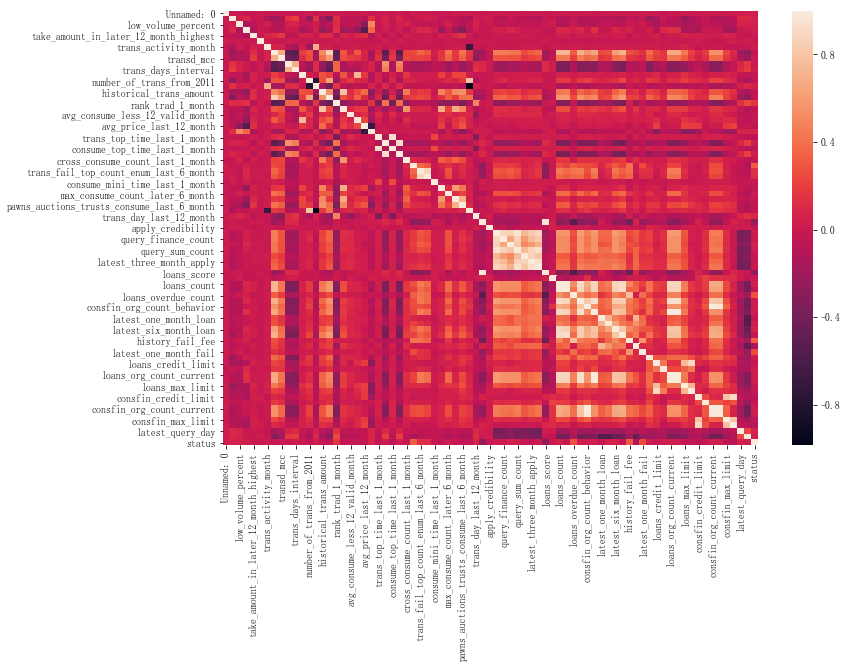

In [63]:
# nunique 大于 10 的 相关性系数
cat_cols = df.nunique()[df.nunique()>=10].index
cat_df = df[cat_cols]
corr_mat = pd.concat((cat_df, y), axis=1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat)

In [64]:
df.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
